Rede neural convolucional com Tensorflow e Keras

Leitura de MNIST 

11501568/11490434 [==============================] - 0s 0us/step
AX: (60000, 28, 28) uint8
AY: (60000,) uint8
QX: (10000, 28, 28) uint8
QY: (10000,) uint8


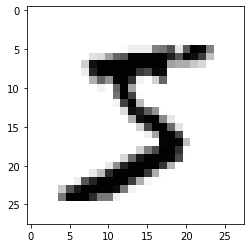

AY[0]: 5
AY2[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
AY2: (60000, 10) float32


In [ ]:
# mnist1.py
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(AX, AY), (QX, QY) = mnist.load_data()
print("AX:",AX.shape, AX.dtype)
print("AY:",AY.shape, AY.dtype)
print("QX:",QX.shape, QX.dtype)
print("QY:",QY.shape, QY.dtype)

AX=255-AX; QX=255-QX
plt.imshow(AX[0],cmap="gray",interpolation="nearest")
plt.show()

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) # devo ter um vetor com 10 posicoes, pra ser compativel com saída da rede neural. numero de classes =10
QY2 = keras.utils.to_categorical(QY, nclasses) # devo ter um vetor com 10 posicoes, pra ser compativel com saída da rede neural. numero de classes =10
print("AY[0]:",AY[0])
print("AY2[0]:",AY2[0]) 
print("AY2:",AY2.shape, AY2.dtype)

Categorização de MNIST com rede neural densa

In [ ]:
# mlp1.py - grad2021
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
import numpy as np; import sys

(AX, AY), (QX, QY) = mnist.load_data()
AX=255-AX; QX=255-QX

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28
#AX = (AX.astype('float32')/255.0)-0.5 # -0.5 a +0.5
#QX = (QX.astype('float32')/255.0)-0.5 # -0.5 a +0.5
AX = AX.astype('float32'); AX=AX-np.mean(AX); AX=AX/np.std(AX)
QX = QX.astype('float32'); QX=QX-np.mean(QX); QX=QX/np.std(Q←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←←²²²²²²²²²²²þ} ¬¬¬¬¬¬666666¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬    ""}   X)


model = Sequential(),. 
model.add(Flatten(input_shape=(nl,nc)))  #conversao de uma matriz com 784 elementos, a partir da entrada de 28,28 (tamanho da imagem de entrada)
model.add(Dense(400, activation='sigmoid')) #camada densa com 400 neuronios cada camada.
model.add(Dense(nclasses, activation='sigmoid')) #camada de saida com 10 elementos. 

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp1.png', show_shapes=True)
model.summary()

opt=optimizers.Adam()  #otimizador melhor que o stocastic gradient. dar uma olhada nele.
model.compile(optimizer=opt, loss='mse', metrics=['accuracy']) # loss = funcao de custo, Mean square error (calcula a perda com msr)

model.fit(AX, AY2, batch_size=100, epochs=40, verbose=2) #treinamento da rede neural.  epochs = 40x que utilizaremos as imagens de treino. batch size = tamanho do lote usado em cada rodada de treinamento.
score = model.evaluate(QX, QY2, verbose=False)  # #saida com 10 valores entre zero e 1, demosntrando posicao do valor calculado pela rede.
print('Test loss:', score[0])
print('Test accuracy:', score[1]) #taxa de acerto das imagens de treino.
model.save('mlp1.h5')
# ELE CHEGA EM 98,15% DE TAXA DE ACERTO. erro em torno de 1,9%.

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 40)          20040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                           

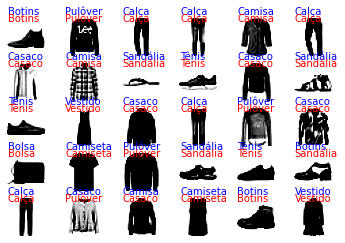

In [ ]:
#cnn1.py - pos2021
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import numpy as np; import sys; import os; from time import time

(AX, AY), (QX, QY) = fashion_mnist.load_data() # AX [60000,28,28] AY [60000,]
AX=255-AX; QX=255-QX

nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) # 3 -> 0001000000
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28
#AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
#QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5 
AX = AX.astype('float32'); AX=AX-np.mean(AX); AX=AX/np.std(AX) 
QX = QX.astype('float32'); QX=QX-np.mean(QX); QX=QX/np.std(QX)

AX = np.expand_dims(AX,axis=3) # AX [60000,28,28,1]
QX = np.expand_dims(QX,axis=3)

model = Sequential() # 28x28x1
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', 
  input_shape=(nl, nc, 1) )) #24x24x20
model.add(MaxPooling2D(pool_size=(2,2))) #12x12x20
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) #8x8x40
model.add(MaxPooling2D(pool_size=(2,2))) #4x4x40
model.add(Flatten()) #640
model.add(Dense(200, activation='relu')) #200
model.add(Dense(nclasses, activation='softmax')) #10

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True); 
model.summary()

opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

t0=time()
model.fit(AX, AY2, batch_size=100, epochs=30, verbose=2)
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()
QP2=model.predict(QX); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
from matplotlib import pyplot as plt
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
f = plt.figure()
for i in range(30):
 f.add_subplot(5,6,i+1)
 plt.imshow( QX[i,:,:,0], cmap="gray", vmin=-0.5, vmax=+0.5)
 plt.axis("off");
 plt.text(0,-3,categorias[QY[i]],color="b")
 plt.text(0, 2,categorias[QP[i]],color="r")
plt.savefig("nomefigura.png")
plt.show()

#model.save('cnn1.h5')